In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
res = pd.read_csv('mass_measurements_titration.csv')

<IPython.core.display.Javascript object>


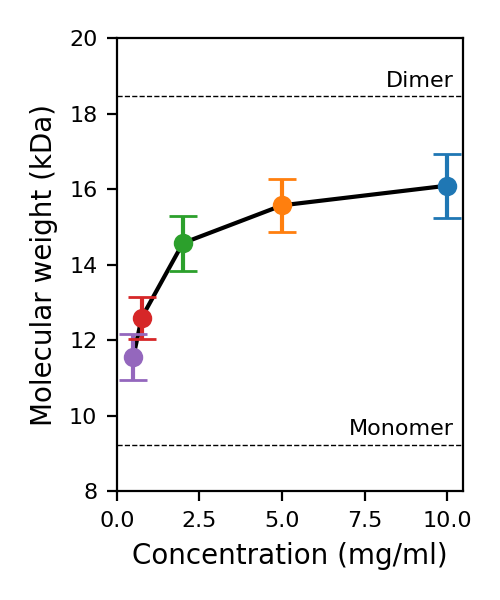

In [6]:
res_sample = res[res['measurement_type'] == 'Mw']
colors = ['tab:purple', 'tab:red', 'tab:green', 'tab:orange', 'tab:blue']

fig, ax = plt.subplots()
ax.plot(res_sample['input_concentration'] / 1000, res_sample['mass'] / 1000, c='k', zorder=0)

for x, y, c in zip(res_sample['input_concentration'] / 1000, res_sample['mass'] / 1000, colors):
    ax.scatter(x, y, c=c)

for x, y, e, c in zip(res_sample['input_concentration'] / 1000, res_sample['mass'] / 1000, 
                  res_sample['uncertainty'] / 1000, colors):
    ax.errorbar(x, y, yerr=e, capsize=5, ls='none', color=c)
    
ax.set_xlim(left=0)
ax.set_ylim(8, 20)
ax.axhline(9.23474, c='k', linestyle='--', linewidth=0.5, zorder=0)
ax.axhline(9.23474 * 2, c='k', linestyle='--', linewidth=0.5, zorder=0)

ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Concentration (mg/ml)')
ax.set_ylabel('Molecular weight (kDa)')

ax.text(10.2, 9.4, 'Monomer', horizontalalignment='right',verticalalignment='bottom', fontsize=8)
ax.text(10.2, 18.6, 'Dimer', horizontalalignment='right',verticalalignment='bottom', fontsize=8)

fig.set_size_inches(2.5, 3)
fig.tight_layout()
fig.savefig('Figs2022/titration_weights.png', dpi=600, transparent=True)

### Model